# Exercise 2: Maximum a Posteriori Estimation With Gradient Ascent

Write a computer program finding the most likely size of the food item $\phi$ for the situation described in Exercise 1. Since the denominator is not dependend on $\phi$ our posterior is proportional to the numerator. We take the natural logarithm since it is monotonic function and so it will have the same maximum than our original function. The objective function to maximize is 

$$
\begin{align}
    \begin{aligned}
        F &= \ln p(\phi) + \ln p(u|\phi) \\
        F &= \ln f(\phi; v_p, \Sigma_p) + \ln f(u;g(\phi),\Sigma_u) \\
        \frac{\partial{F}}{\partial{\phi}} &= \frac{v_p-\phi}{\Sigma_p} + \frac{u-g(\phi)}{\Sigma_u} g'(\phi)
    \end{aligned}
\end{align}
$$

Initialize $\phi=v_p$, and then find its values in the next 5 time units. Update the current current guess with
$$\phi(t + \Delta t)=\phi (t)+\Delta t \frac{\partial{F}}{\partial{\phi}}$$ and $\Delta t = 0.01$.


In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time

## Parameters

In [2]:
u = 2 # light intensity data point
sigma_u = 1 # sigma likelihood
v_p = 3 # mean of prior distribution
sigma_p = 1 # sigma for prior


## Objective function

In [3]:
def objective(phi, u, v_p, sigma_p, sigma_u):
    return (np.log(sp.stats.norm.pdf(phi, v_p, sigma_p)) + 
            np.log(sp.stats.norm.pdf(u, phi**2, sigma_u)))

## Gradient function

In [4]:
def gradient(phi, u, v_p, sigma_p, sigma_u):
    return ((v_p - phi)/sigma_p) + (((u - phi**2)/sigma_u)*2*phi)
    

## Gradient ascent

In [5]:
phi_init = v_p 
dt = 0.01
tmax = 5
t = 0
phi_list = []
t_list = []
obj_list = []

while t <= tmax:
    if t == 0:
        phi_current = phi_init
        obj_current = objective(phi_init, u, v_p, sigma_p, sigma_u)
    else:
        phi_current = phi_current + dt*gradient(phi_current, u, v_p, sigma_p, sigma_u)
        obj_current = objective(phi_current, u, v_p, sigma_p, sigma_u)

    phi_list.append(phi_current)
    t_list.append(t)
    obj_list.append(obj_current)
    t += dt


## Plot

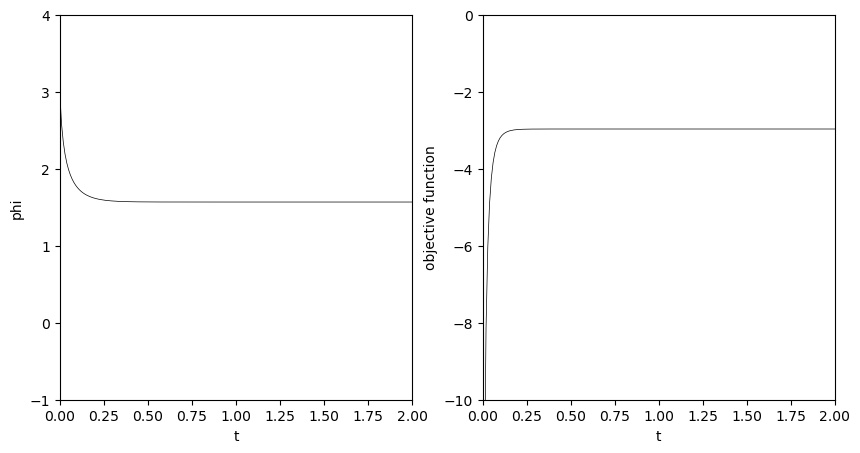

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for i, ax in enumerate(axs):
    if i == 0:
        ax.plot(t_list, phi_list, color = 'black', linewidth=0.5)
        ax.set_xlim([0, 2])
        ax.set_ylim([-1, 4])
        ax.set_ylabel('phi')
        ax.set_xlabel('t')
    
    else:
        ax.plot(t_list, obj_list, color = 'black', linewidth=0.5)
        ax.set_ylim([-10, 0])
        ax.set_xlim([0, 2])
        ax.set_ylabel('objective function')
        ax.set_xlabel('t')


## The function converges to the MAP

In [7]:
phi_list[-1]

1.567468374852423